In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories = pd.read_csv('/content/calories.csv')

In [ ]:
calories.head()

In [4]:
exercise_data = pd.read_csv('/content/exercise.csv')


In [ ]:
exercise_data.head()

In [6]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

In [ ]:
calories_data.info()

In [ ]:
calories_data.isnull().sum()

In [ ]:
calories_data.describe()

In [11]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

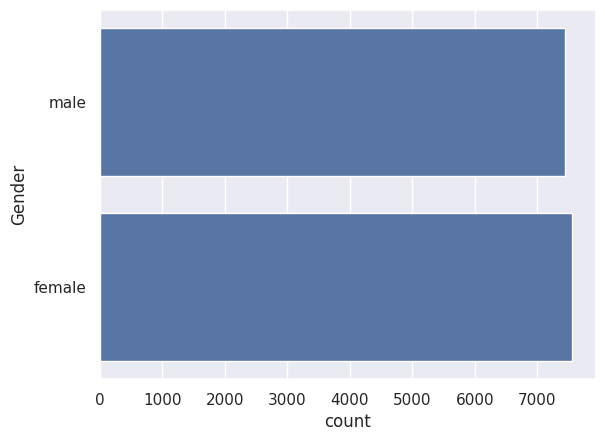

In [12]:
sns.countplot(calories_data['Gender'])

In [ ]:
sns.histplot(calories_data['Age'])

In [ ]:
sns.distplot(calories_data['Height'])

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Assuming 'gender' is the column containing string values
label_encoder = LabelEncoder()
calories_data['gender'] = label_encoder.fit_transform(calories_data['Gender'])


In [17]:
# Assuming 'column_to_drop' is the name of the column you want to drop
calories_data = calories_data.drop(columns=['Gender'])


In [18]:
correlation = calories_data.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
calories_data.head()

In [22]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

In [ ]:
print(Y)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [27]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, Y_train)

In [29]:
test_data_prediction = model.predict(X_test)

In [30]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [31]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [32]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4836762582858403
